In [1]:
import os
os.chdir('../')

In [2]:
from data.sparse_molecular_dataset import SparseMolecularDataset

In [3]:
data = SparseMolecularDataset()

In [4]:
mol_data_dir = 'data/gdb9_9nodes.sparsedataset'

data.load(mol_data_dir)

In [5]:
from rdkit.Chem import Draw

img=Draw.MolsToGridImage(data.data[:500],molsPerRow=8,subImgSize=(200,200), maxMols=500)    

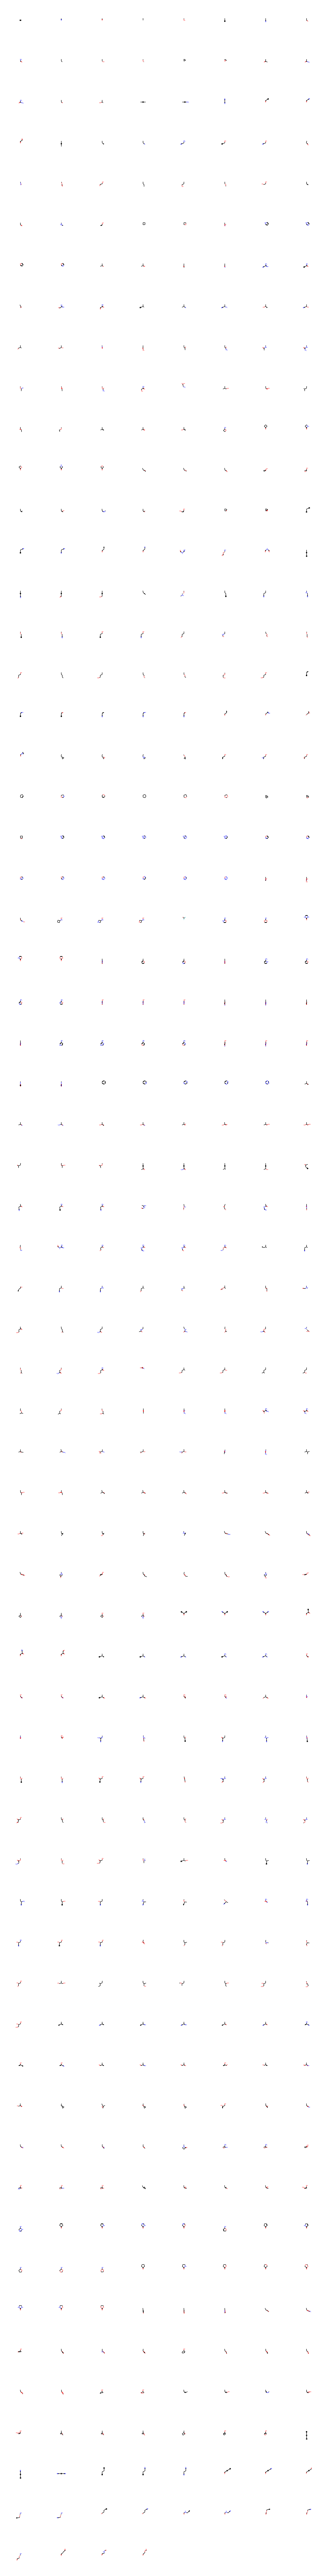

In [6]:
img

In [7]:
from utils.utils import *

m0, m1 = all_scores(data.data, data, norm=True)

In [8]:
from collections import defaultdict

scores = defaultdict(list)

for k, v in m1.items():
    scores[k].append(v)
for k, v in m0.items():
    scores[k].append(np.array(v)[np.nonzero(v)].mean())

In [9]:
scores

defaultdict(list,
            {'valid': [100.0],
             'unique': [99.74919464447966],
             'novel': [0.0],
             'NP': [0.885315752950223],
             'QED': [0.4610467856549387],
             'Solute': [0.2886713177743184],
             'SA': [0.32668536734773],
             'diverse': [0.6705926067229684],
             'drugcand': [0.35508321889637423]})

In [10]:
benchmarking_scores = ['NP', 'QED', 'Solute', 'SA', 'drugcand']

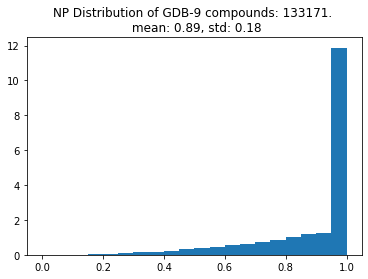

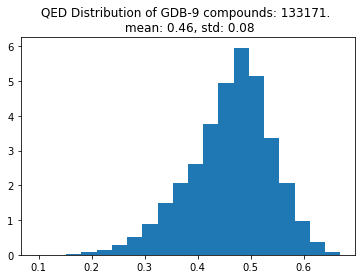

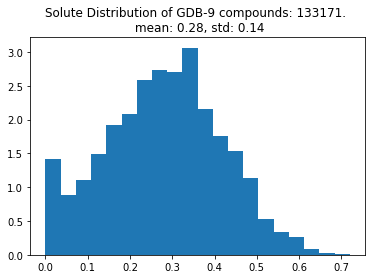

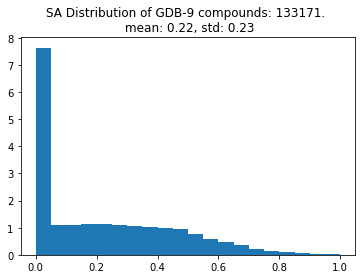

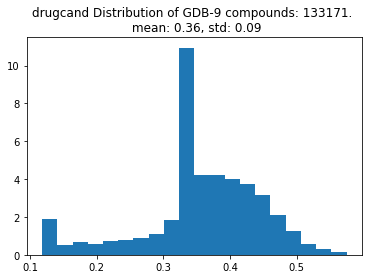

In [12]:
for idx, score in enumerate(benchmarking_scores):
    mols_score = m0[score]
    mols_score_avg = sum(mols_score)/len(mols_score)
    mols_score_std = np.std(mols_score)
    plt.figure(idx)
    plt.hist(mols_score, bins=20, density=True)
    plt.title(score + ' Distribution of GDB-9 compounds: {}. \n mean: {:.2f}, std: {:.2f}'.format(len(mols_score), mols_score_avg, mols_score_std))